# Exploring Dandiset 001174: Calcium imaging in SMA and M1 of macaques

**Note:** This notebook was generated with the assistance of AI. Please be cautious when interpreting the code or results and verify findings independently.

## Overview

This Dandiset contains calcium imaging data from the supplementary motor area (SMA) and primary motor cortex (M1) of rhesus macaques. The study uses genetically encoded calcium indicators (GCaMP6f) and miniature microscopes through GRIN lenses to record neural activity while macaques were at rest and performing arm-reaching tasks.

**Dandiset Link:** https://dandiarchive.org/dandiset/001174/0.250331.2218

**Citation:**  
Galvan, Adriana; Martel, Anne-Caroline; Pittard, Damien; Devergnas, Annaelle; Risk, Benjamin; Nassi, Jonathan J.; Yu, Waylin; Downer, Joshua D. ; Wichmann, Thomas (2025) Calcium imaging in SMA and M1 of macaques (Version 0.250331.2218) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001174/0.250331.2218

### Dataset Contents

- **Species:** Rhesus macaque (Macaca mulatta)
- **Subjects:** 4 macaques  
- **Data types:** One-photon calcium imaging videos, segmented cell traces, processed cell masks, behavioral task metadata
- **Modality:** One-photon population calcium imaging using GCaMP6f
- **Structure:** Data stored in NWB files, organized by session and subject

## Required Packages

The following packages are required to run this notebook:
- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `matplotlib`
- `numpy`
- `pandas`

In [1]:
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from dandi.dandiapi import DandiAPIClient
from itertools import islice

## Exploring the Dandiset Metadata

In [2]:
# Get basic information about the dandiset
client = DandiAPIClient()
dandiset = client.get_dandiset("001174", "0.250331.2218")
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

Dandiset name: Calcium imaging in SMA and M1 of macaques
Dandiset URL: https://dandiarchive.org/dandiset/001174/0.250331.2218


## Exploring NWB Files in the Dandiset

In [3]:
# List NWB files in the dandiset
assets = list(islice(dandiset.get_assets_by_glob("*.nwb"), 20))

print(f"Number of .nwb files (showing up to 20): {len(assets)}\n")
for i, asset in enumerate(assets):
    print(f"{i+1}. {asset.path} - {asset.size/1e9:.2f} GB")

Number of .nwb files (showing up to 20): 20

1. sub-V/sub-V_ses-20230309T110929_ophys.nwb - 10.66 GB
2. sub-Q/sub-Q_ophys.nwb - 0.79 GB
3. sub-Q/sub-Q_ses-20220922T131747_ophys.nwb - 0.79 GB
4. sub-Q/sub-Q_ses-20221003T131952_ophys.nwb - 1.70 GB
5. sub-Q/sub-Q_ses-20221028T121142_ophys.nwb - 1.56 GB
6. sub-Q/sub-Q_ses-20221201T132256_ophys.nwb - 1.66 GB
7. sub-Q/sub-Q_ses-20221202T122907_ophys.nwb - 1.57 GB
8. sub-Q/sub-Q_ses-20221206T121002_ophys.nwb - 25.12 GB
9. sub-Q/sub-Q_ses-20220915T133954_ophys.nwb - 1.18 GB
10. sub-Q/sub-Q_ses-20221201T134628_ophys.nwb - 0.84 GB
11. sub-Q/sub-Q_ses-20221028T123313_ophys.nwb - 1.12 GB
12. sub-Q/sub-Q_ses-20220922T133032_ophys.nwb - 1.57 GB
13. sub-Q/sub-Q_ses-20221003T134805_ophys.nwb - 1.56 GB
14. sub-Q/sub-Q_ses-20221202T125146_ophys.nwb - 0.91 GB
15. sub-Q/sub-Q_ses-20221206T123719_ophys.nwb - 0.90 GB
16. sub-V/sub-V_ses-20230316T094035_ophys.nwb - 10.25 GB
17. sub-V/sub-V_ses-20230309T104556_ophys.nwb - 24.74 GB
18. sub-F/sub-F_ses-20240213

The dataset is organized by subject (e.g., sub-Q, sub-V, sub-F, sub-U) with multiple sessions per subject. File sizes range from ~0.8 GB to 25 GB depending on session length and data recorded.

## Loading and Exploring NWB File Structure

Let's examine a representative NWB file to understand its structure and contents.

In [4]:
# Select a representative file for exploration
asset_path = 'sub-Q/sub-Q_ses-20221206T121002_ophys.nwb'
asset = next(dandiset.get_assets_by_glob(asset_path))
url = asset.download_url

# Open the file remotely (streaming)
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file, 'r')
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

# Display basic metadata
print('Session description:', nwb.session_description)
print('Session start time:', nwb.session_start_time)
print('Subject ID:', nwb.subject.subject_id)
print('Species:', nwb.subject.species)
print('Sex:', nwb.subject.sex)
print('Age:', getattr(nwb.subject, 'age', 'n/a'))

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.7.0, loaded version: 2.8.0
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)


Session description: Calcium imaging in SMA during the spontaneous condition
Session start time: 2022-12-06 12:10:02.429000+00:00
Subject ID: Q
Species: Macaca mulatta
Sex: F
Age: P5Y


### Data Structure Overview

In [5]:
# Examine the main data components
ophys = nwb.processing['ophys']
fluorescence = ophys.data_interfaces['Fluorescence']
rrs = fluorescence.roi_response_series['RoiResponseSeries']
event_amp = ophys.data_interfaces['EventAmplitude']
plane_seg = ophys.data_interfaces['ImageSegmentation'].plane_segmentations['PlaneSegmentation']
onphs = nwb.acquisition['OnePhotonSeries']

print('--- Data shapes ---')
print('Raw movie:', onphs.data.shape)
print('Fluorescence traces:', rrs.data.shape)
print('Event amplitudes:', event_amp.data.shape)
print('Number of segmented cells:', len(plane_seg.to_dataframe()))

print('\n--- Technical details ---')
print('Imaging rate:', onphs.rate, 'Hz')
print('Device:', onphs.imaging_plane.device.description)
print('Manufacturer:', onphs.imaging_plane.device.manufacturer)
print('Excitation wavelength:', onphs.imaging_plane.excitation_lambda, 'nm')

--- Data shapes ---
Raw movie: (12218, 1280, 800)
Fluorescence traces: (12218, 18)
Event amplitudes: (12218, 18)


Number of segmented cells: 18

--- Technical details ---
Imaging rate: 10.0 Hz
Device: NVista3
Manufacturer: Inscopix, Inc.
Excitation wavelength: 475.0 nm


## Visualizing Cell Segmentation

Let's examine the spatial distribution of segmented cells (ROIs) in the field of view.

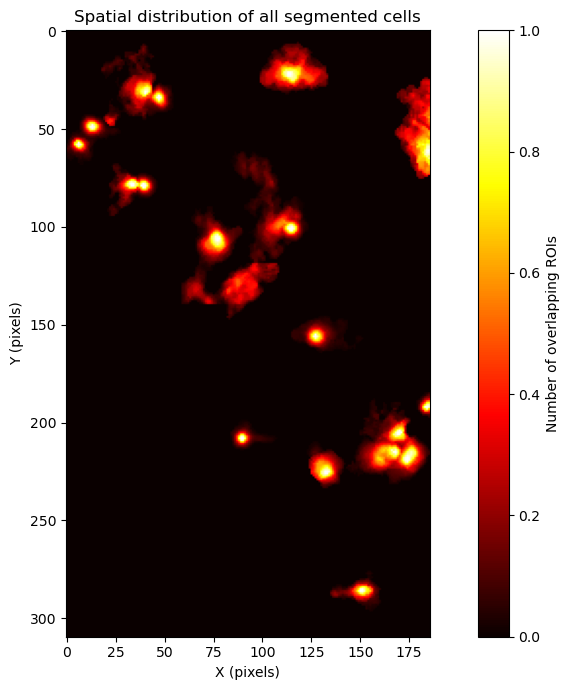

Number of cells detected: 18
Mean ± std ROI size: 447.8 ± 482.6 pixels


In [6]:
# Get all cell masks and create a spatial overview
roi_df = plane_seg.to_dataframe()
mask_arrays = [plane_seg['image_mask'].data[i][:] for i in range(len(roi_df))]

# Create heatmap showing all cell footprints
mask_stack = np.stack(mask_arrays, axis=0)
max_mask = np.max(mask_stack, axis=0)

plt.figure(figsize=(10, 7))
plt.imshow(max_mask, cmap='hot')
plt.title('Spatial distribution of all segmented cells')
plt.colorbar(label='Number of overlapping ROIs')
plt.xlabel('X (pixels)')
plt.ylabel('Y (pixels)')
plt.tight_layout()
plt.show()

# Calculate ROI sizes
roi_sizes = [np.count_nonzero(mask) for mask in mask_arrays]
print(f'Number of cells detected: {len(roi_sizes)}')
print(f'Mean ± std ROI size: {np.mean(roi_sizes):.1f} ± {np.std(roi_sizes):.1f} pixels')

## Examining Raw Calcium Imaging Data

Let's look at a few frames from the raw calcium imaging movie to understand the data structure.

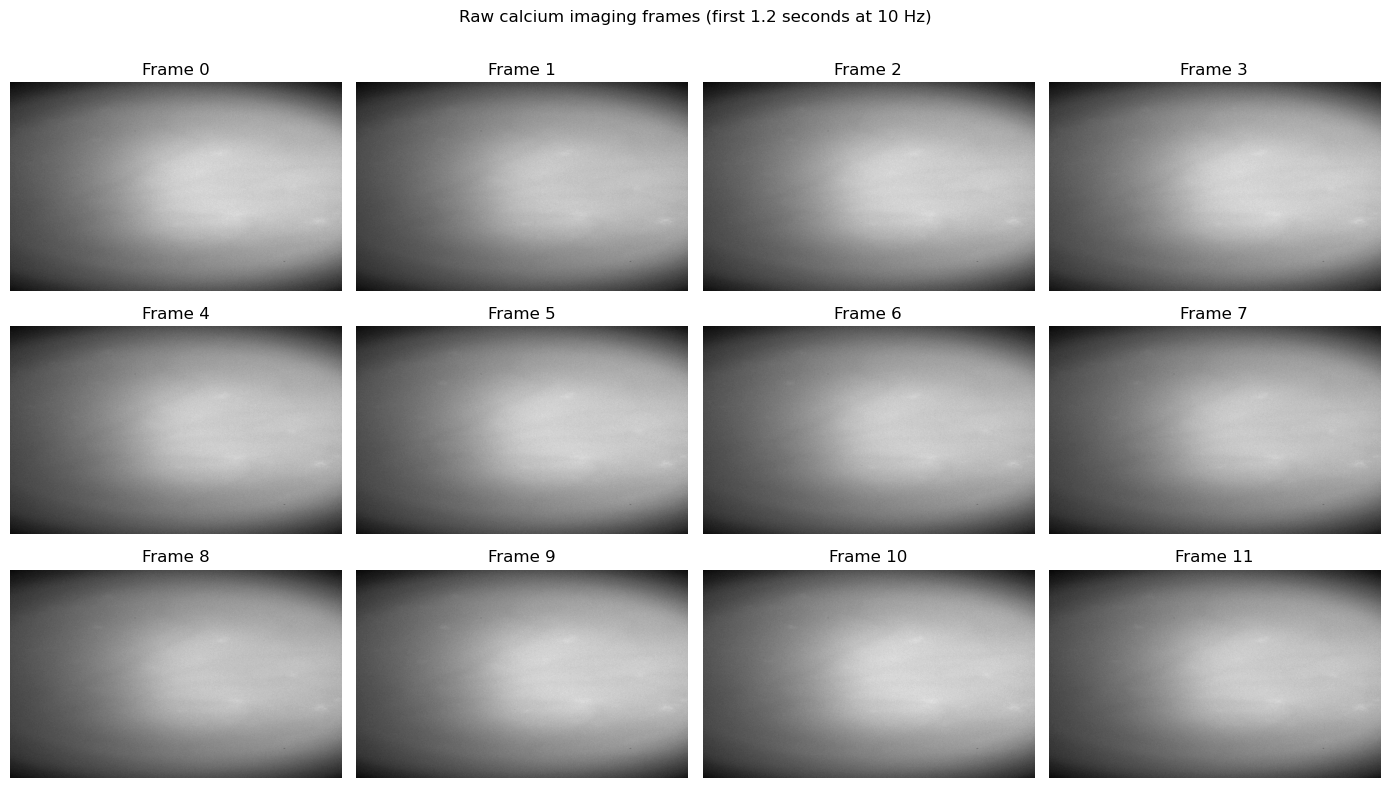

In [7]:
# Preview a short segment of the raw movie (first 12 frames)
frames_to_show = 12
movie_segment = onphs.data[:frames_to_show]

# Create a montage of frames
n_cols = 4
n_rows = int(np.ceil(frames_to_show / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 8))

for i in range(frames_to_show):
    ax = axes[i // n_cols, i % n_cols]
    ax.imshow(movie_segment[i], cmap='gray', aspect='auto')
    ax.set_title(f'Frame {i}')
    ax.axis('off')

# Hide unused subplots
for i in range(frames_to_show, n_rows * n_cols):
    axes.flat[i].axis('off')

plt.suptitle('Raw calcium imaging frames (first 1.2 seconds at 10 Hz)')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## Analyzing Fluorescence Traces

Now let's examine the processed fluorescence traces extracted from the segmented cells.

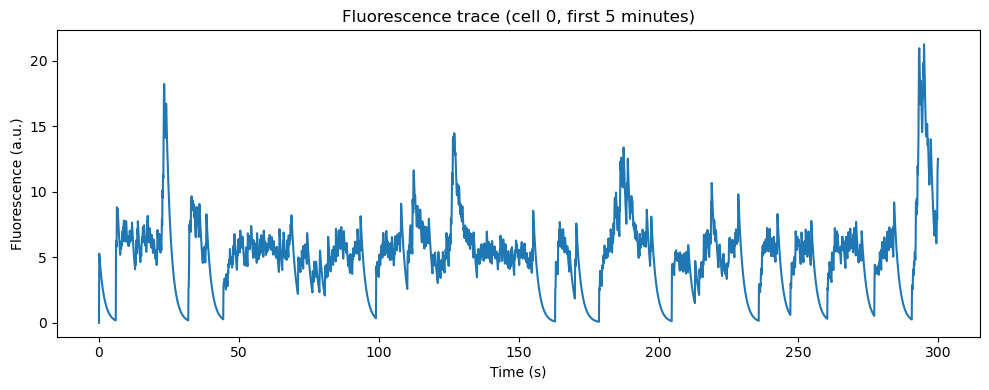

In [8]:
# Plot fluorescence trace for the first cell
sampling_rate = rrs.rate
n_seconds_plot = 5 * 60  # 5 minutes
n_samples_plot = int(n_seconds_plot * sampling_rate)

time = np.arange(n_samples_plot) / sampling_rate
f_trace = rrs.data[:n_samples_plot, 0]  # First ROI

plt.figure(figsize=(10, 4))
plt.plot(time, f_trace)
plt.xlabel('Time (s)')
plt.ylabel('Fluorescence (a.u.)')
plt.title('Fluorescence trace (cell 0, first 5 minutes)')
plt.tight_layout()
plt.show()

## Comparing Raw Fluorescence vs Event Amplitudes

The dataset includes both raw fluorescence traces and processed event amplitudes. Let's compare them for the same cell.

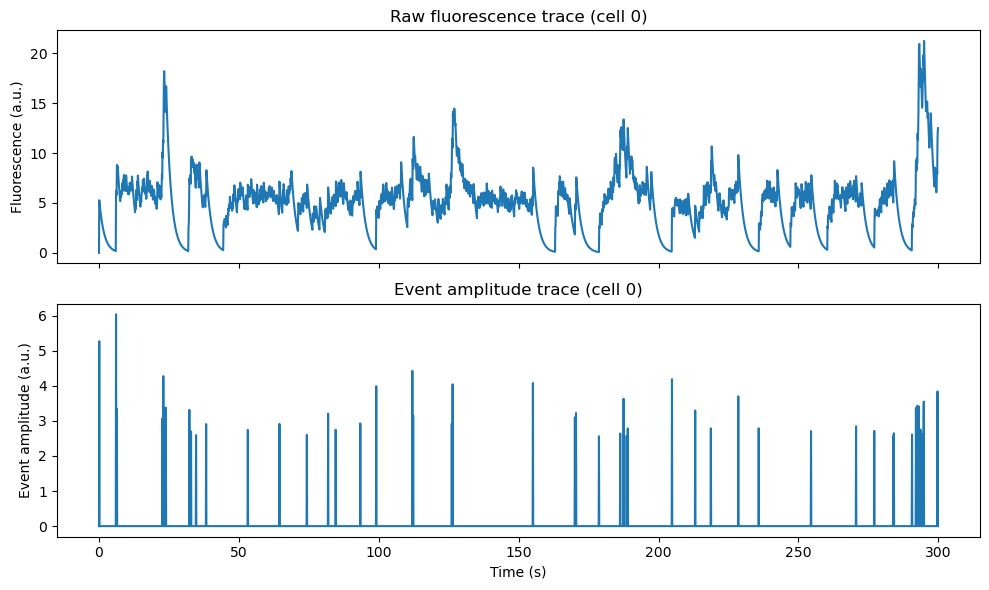

In [9]:
# Plot both fluorescence and event amplitude for the first cell
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Raw fluorescence
ax1.plot(time, f_trace)
ax1.set_ylabel('Fluorescence (a.u.)')
ax1.set_title('Raw fluorescence trace (cell 0)')

# Event amplitude
ampl_trace = event_amp.data[:n_samples_plot, 0]
ax2.plot(time, ampl_trace)
ax2.set_ylabel('Event amplitude (a.u.)')
ax2.set_xlabel('Time (s)')
ax2.set_title('Event amplitude trace (cell 0)')

plt.tight_layout()
plt.show()

The event amplitude trace shows sparse, discrete events compared to the continuous fluorescence signal, indicating processed detection of calcium transients.

## Cell-wise Activity Statistics

Let's calculate summary statistics across all cells to understand population activity patterns.

Event rates per cell (events/min):
Cell 0: 10.07
Cell 1: 1.03
Cell 2: 6.97
Cell 3: 1.57
Cell 4: 23.08
Cell 5: 1.82
Cell 6: 1.23
Cell 7: 1.62
Cell 8: 3.58
Cell 9: 2.26
Cell 10: 4.08
Cell 11: 6.24
Cell 12: 0.64
Cell 13: 5.30
Cell 14: 1.03
Cell 15: 49.40
Cell 16: 39.14
Cell 17: 70.96

Population statistics:
Mean event rate: 12.78 ± 19.53 events/min
Range: 0.64 - 70.96 events/min


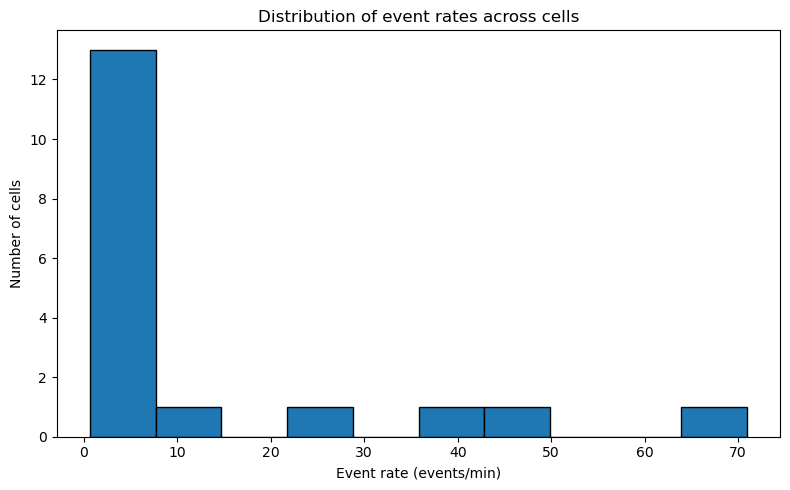

In [10]:
# Calculate event rates for all cells
num_cells = rrs.data.shape[1]
minutes = rrs.data.shape[0] / sampling_rate / 60

# Count events (nonzero amplitudes) for each cell
cell_event_counts = [(event_amp.data[:, i] > 0).sum() for i in range(num_cells)]
cell_event_rates = [count / minutes for count in cell_event_counts]

print('Event rates per cell (events/min):')
for i, rate in enumerate(cell_event_rates):
    print(f'Cell {i}: {rate:.2f}')

print(f'\nPopulation statistics:')
print(f'Mean event rate: {np.mean(cell_event_rates):.2f} ± {np.std(cell_event_rates):.2f} events/min')
print(f'Range: {np.min(cell_event_rates):.2f} - {np.max(cell_event_rates):.2f} events/min')

# Plot distribution of event rates
plt.figure(figsize=(8, 5))
plt.hist(cell_event_rates, bins=10, edgecolor='black')
plt.xlabel('Event rate (events/min)')
plt.ylabel('Number of cells')
plt.title('Distribution of event rates across cells')
plt.tight_layout()
plt.show()

## Visualizing Individual Cell Properties

Let's examine both the spatial footprint and temporal activity for a specific cell.

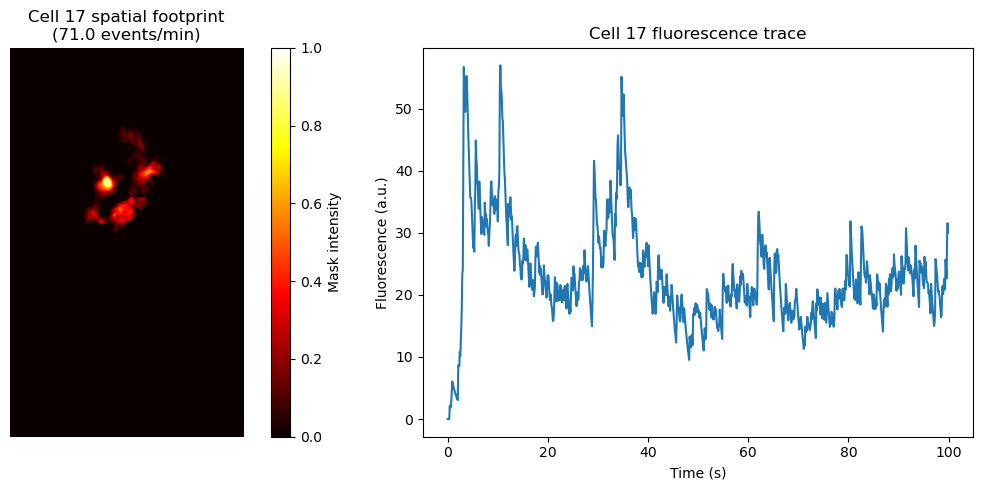

In [11]:
# Select an active cell for detailed visualization
cell_idx = np.argmax(cell_event_rates)  # Most active cell
mask = plane_seg['image_mask'].data[cell_idx][:]
trace = rrs.data[:1000, cell_idx]  # First 100 seconds
time_short = np.arange(1000) / sampling_rate

plt.figure(figsize=(12, 5))

# Plot cell mask
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='hot')
plt.title(f'Cell {cell_idx} spatial footprint\n({cell_event_rates[cell_idx]:.1f} events/min)')
plt.colorbar(label='Mask intensity')
plt.axis('off')

# Plot fluorescence trace
plt.subplot(1, 2, 2)
plt.plot(time_short, trace)
plt.title(f'Cell {cell_idx} fluorescence trace')
plt.xlabel('Time (s)')
plt.ylabel('Fluorescence (a.u.)')

plt.tight_layout()
plt.show()

## Summary and Next Steps

This notebook demonstrates how to:
- Access and explore NWB files in the Dandiset using the DANDI API
- Load calcium imaging data, cell segmentation masks, and processed traces
- Visualize spatial and temporal aspects of the neural activity data
- Calculate basic statistics across the cell population

**Potential analyses to explore further:**
- Cross-correlation analysis between cells
- Population dynamics and synchrony patterns  
- Comparison across sessions, subjects, or behavioral conditions
- Integration with behavioral task data if available
- Advanced signal processing of calcium transients